In [1]:
import pandas as pd
import functools
import numpy as np

works_custs = pd.read_csv('AdvWorksCusts.csv')
bike_buyer = pd.read_csv('AW_BikeBuyer.csv')

print(works_custs.columns)
print(bike_buyer.columns)


Index(['CustomerID', 'Title', 'FirstName', 'MiddleName', 'LastName', 'Suffix',
       'AddressLine1', 'AddressLine2', 'City', 'StateProvinceName',
       'CountryRegionName', 'PostalCode', 'PhoneNumber', 'BirthDate',
       'Education', 'Occupation', 'Gender', 'MaritalStatus', 'HomeOwnerFlag',
       'NumberCarsOwned', 'NumberChildrenAtHome', 'TotalChildren',
       'YearlyIncome'],
      dtype='object')
Index(['CustomerID', 'BikeBuyer'], dtype='object')


In [2]:
works_custs.head()

,CustomerID,Title,FirstName,MiddleName,LastName,Suffix,AddressLine1,AddressLine2,City,StateProvinceName,...,BirthDate,Education,Occupation,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome
0,11000,NaN,Jon,V,Yang,NaN,3761 N. 14th St,NaN,Rockhampton,Queensland,...,4/8/66,Bachelors,Professional,M,M,1,0,0,2,137947
1,11001,NaN,Eugene,L,Huang,NaN,2243 W St.,NaN,Seaford,Victoria,...,5/14/65,Bachelors,Professional,M,S,0,1,3,3,101141
2,11002,NaN,Ruben,NaN,Torres,NaN,5844 Linden Land,NaN,Hobart,Tasmania,...,8/12/65,Bachelors,Professional,M,M,1,1,3,3,91945
3,11003,NaN,Christy,NaN,Zhu,NaN,1825 Village Pl.,NaN,North Ryde,New South Wales,...,2/15/68,Bachelors,Professional,F,S,0,1,0,0,86688
4,11004,NaN,Elizabeth,NaN,Johnson,NaN,7553 Harness Circle,NaN,Wollongong,New South Wales,...,8/8/68,Bachelors,Professional,F,S,1,4,5,5,92771


In [3]:
bike_buyer.head()

,CustomerID,BikeBuyer
0,11000,0
1,11001,1
2,11002,0
3,11003,0
4,11004,1


In [4]:
#dfs = [works_custs, bike_buyer]
#nan_value = 0
#k = np.arange(len(dfs)).astype(str)
# aw_bikebuyer = pd.concat([x.set_index('CustomerID') for x in dfs], axis=1, join='left', keys=k)

aw_test_bikebuyer = pd.merge(works_custs, bike_buyer, on='CustomerID')
print(aw_test_bikebuyer.columns)
print(aw_test_bikebuyer)

Index(['CustomerID', 'Title', 'FirstName', 'MiddleName', 'LastName', 'Suffix',
       'AddressLine1', 'AddressLine2', 'City', 'StateProvinceName',
       'CountryRegionName', 'PostalCode', 'PhoneNumber', 'BirthDate',
       'Education', 'Occupation', 'Gender', 'MaritalStatus', 'HomeOwnerFlag',
       'NumberCarsOwned', 'NumberChildrenAtHome', 'TotalChildren',
       'YearlyIncome', 'BikeBuyer'],
      dtype='object')
       CustomerID Title   FirstName MiddleName   LastName Suffix  \
0           11000   NaN         Jon          V       Yang    NaN   
1           11001   NaN      Eugene          L      Huang    NaN   
2           11002   NaN       Ruben        NaN     Torres    NaN   
3           11003   NaN     Christy        NaN        Zhu    NaN   
4           11004   NaN   Elizabeth        NaN    Johnson    NaN   
5           11005   NaN       Julio        NaN       Ruiz    NaN   
6           11006   NaN       Janet          G    Alvarez    NaN   
7           11007   NaN       Marco

In [5]:
aw_test_bikebuyer.to_csv('aw_test_bikebuyer.csv', encoding='utf-8', index=False)

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import numpy.random as nr
import math
from sklearn import preprocessing
import sklearn.model_selection as ms
from sklearn import linear_model
import sklearn.metrics as sklm

%matplotlib inline

In [7]:
aw_test_bikebuyer = pd.read_csv('aw_test_bikebuyer.csv')
print(aw_test_bikebuyer.shape)
aw_test_bikebuyer.head()

(16749, 24)


,CustomerID,Title,FirstName,MiddleName,LastName,Suffix,AddressLine1,AddressLine2,City,StateProvinceName,...,Education,Occupation,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,BikeBuyer
0,11000,NaN,Jon,V,Yang,NaN,3761 N. 14th St,NaN,Rockhampton,Queensland,...,Bachelors,Professional,M,M,1,0,0,2,137947,0
1,11001,NaN,Eugene,L,Huang,NaN,2243 W St.,NaN,Seaford,Victoria,...,Bachelors,Professional,M,S,0,1,3,3,101141,1
2,11002,NaN,Ruben,NaN,Torres,NaN,5844 Linden Land,NaN,Hobart,Tasmania,...,Bachelors,Professional,M,M,1,1,3,3,91945,0
3,11003,NaN,Christy,NaN,Zhu,NaN,1825 Village Pl.,NaN,North Ryde,New South Wales,...,Bachelors,Professional,F,S,0,1,0,0,86688,0
4,11004,NaN,Elizabeth,NaN,Johnson,NaN,7553 Harness Circle,NaN,Wollongong,New South Wales,...,Bachelors,Professional,F,S,1,4,5,5,92771,1


In [8]:
labels = np.array(aw_test_bikebuyer['BikeBuyer'])

In [9]:
def encode_string(cat_features):
    ## First encode the strings to numeric categories
    enc = preprocessing.LabelEncoder()
    enc.fit(cat_features)
    enc_cat_features = enc.transform(cat_features)
    ## Now, apply one hot encoding
    ohe = preprocessing.OneHotEncoder()
    encoded = ohe.fit(enc_cat_features.reshape(-1,1))
    return encoded.transform(enc_cat_features.reshape(-1,1)).toarray()

categorical_columns = ['Education', 'Occupation', 'Gender', 'MaritalStatus']

Features = encode_string(aw_test_bikebuyer['BikeBuyer'])
for col in categorical_columns:
    temp = encode_string(aw_test_bikebuyer[col])
    Features = np.concatenate([Features, temp], axis = 1)

print(Features.shape)
print(Features[:2, :])    

(16749, 16)
[[1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0.]
 [0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1.]]


/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a Lab

In [10]:
Features = np.concatenate([Features, np.array(aw_test_bikebuyer[['HomeOwnerFlag', 'NumberCarsOwned', 
                            'NumberChildrenAtHome', 'YearlyIncome']])], axis = 1)
print(Features.shape)
print(Features[:2, :])  

(16749, 20)
[[1.00000e+00 0.00000e+00 1.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00
  0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 1.00000e+00 0.00000e+00
  0.00000e+00 1.00000e+00 1.00000e+00 0.00000e+00 1.00000e+00 0.00000e+00
  0.00000e+00 1.37947e+05]
 [0.00000e+00 1.00000e+00 1.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00
  0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 1.00000e+00 0.00000e+00
  0.00000e+00 1.00000e+00 0.00000e+00 1.00000e+00 0.00000e+00 1.00000e+00
  3.00000e+00 1.01141e+05]]


In [11]:
## Randomly sample cases to create independent training and test data
nr.seed(9988)
indx = range(Features.shape[0])
indx = ms.train_test_split(indx, test_size = 500, shuffle=False) #need to have shuffle=False in here for correct answer
X_train = Features[indx[0],:]
y_train = np.ravel(labels[indx[0]])
X_test = Features[indx[1],:]
y_test = np.ravel(labels[indx[1]])

scaler = preprocessing.StandardScaler().fit(X_train[:,20:])
X_train[:,20:] = scaler.transform(X_train[:,20:])
X_test[:,20:] = scaler.transform(X_test[:,20:])
X_train[:2,]

In [147]:
logistic_mod = linear_model.LogisticRegression() 
logistic_mod.fit(X_train, y_train)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [148]:
print(logistic_mod.intercept_)
print(logistic_mod.coef_)

[-0.21020809]
[[-6.88902760e+00  6.67881951e+00  5.37664949e-02 -2.46099416e-02
  -8.30856503e-02 -4.37815884e-02 -1.12497406e-01 -4.85102379e-02
  -2.18900152e-01 -2.40002267e-02  3.92525123e-02  4.19500127e-02
  -2.44876319e-01  3.46682278e-02 -4.53587528e-01  2.43379437e-01
   3.92768006e-03 -8.03155558e-02  4.07595335e-01 -6.58289065e-02
   2.40624266e-01]]


In [149]:
probabilities = logistic_mod.predict_proba(X_test)
print(probabilities[:500,:])

[[5.20414763e-04 9.99479585e-01]
 [9.98755057e-01 1.24494318e-03]
 [1.65754257e-03 9.98342457e-01]
 [9.99390791e-01 6.09209291e-04]
 [9.98820866e-01 1.17913410e-03]
 [9.98516061e-01 1.48393922e-03]
 [1.23890075e-03 9.98761099e-01]
 [1.64966478e-03 9.98350335e-01]
 [9.99284141e-01 7.15858806e-04]
 [9.99372211e-01 6.27789082e-04]
 [9.99505111e-01 4.94888523e-04]
 [3.64046116e-03 9.96359539e-01]
 [9.99433525e-01 5.66474553e-04]
 [9.51920887e-04 9.99048079e-01]
 [9.99582721e-01 4.17279388e-04]
 [9.98701766e-01 1.29823418e-03]
 [9.99596361e-01 4.03639445e-04]
 [9.99350433e-01 6.49567437e-04]
 [9.99565243e-01 4.34756880e-04]
 [9.99160498e-01 8.39501945e-04]
 [9.99355862e-01 6.44138462e-04]
 [9.51017522e-04 9.99048982e-01]
 [9.99602955e-01 3.97045318e-04]
 [9.98797229e-01 1.20277069e-03]
 [3.83886039e-04 9.99616114e-01]
 [2.95668160e-04 9.99704332e-01]
 [2.48210628e-04 9.99751789e-01]
 [9.44043625e-04 9.99055956e-01]
 [9.99576954e-01 4.23045867e-04]
 [2.87909777e-04 9.99712090e-01]
 [4.445813

In [150]:
def score_model(probs, threshold):
    return np.array([1 if x > threshold else 0 for x in probs[:,1]])
scores = score_model(probabilities, 0.5)
print(np.array(scores[:500]))
print(y_test[:500])

[1 0 1 0 0 0 1 1 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 1 1 1 1 0 1 1 1 1 1 1 1 1
 1 1 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1
 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 1 0 0 0 1 0 0 0 1 0 1 1 1
 1 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0
 1 1 0 1 0 1 0 1 1 1 1 1 0 1 1 0 1 1 0 1 0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1 0
 1 0 1 1 0 1 1 1 1 0 1 0 0 0 1 1 1 1 1 0 0 1 1 0 1 1 1 1 0 0 0 0 0 0 1 1 0
 0 0 1 0 0 0 1 1 1 1 1 1 1 0 0 0 0 0 0 1 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 1 0 0 1 0 0 1 0 0 0 1 0 1 1 1
 1 1 0 1 1 0 0 0 1 1 1 0 0 1 1 1 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 1 1 0 0 1 0 0 1 1 0 1 0 0 1 1 1 0 1 0 0
 1 1 1 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 1 0 0 1 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 

In [156]:
#df = pd.DataFrame(scores)
#df.head()

In [157]:
#df.to_csv('prediction.csv')

In [153]:
def print_metrics(labels, scores):
    metrics = sklm.precision_recall_fscore_support(labels, scores)
    conf = sklm.confusion_matrix(labels, scores)
    print('                 Confusion matrix')
    print('                 Score positive    Score negative')
    print('Actual positive    %6d' % conf[0,0] + '             %5d' % conf[0,1])
    print('Actual negative    %6d' % conf[1,0] + '             %5d' % conf[1,1])
    print('')
    print('Accuracy  %0.2f' % sklm.accuracy_score(labels, scores))
    print(' ')
    print('           Positive      Negative')
    print('Num case   %6d' % metrics[3][0] + '        %6d' % metrics[3][1])
    print('Precision  %6.2f' % metrics[0][0] + '        %6.2f' % metrics[0][1])
    print('Recall     %6.2f' % metrics[1][0] + '        %6.2f' % metrics[1][1])
    print('F1         %6.2f' % metrics[2][0] + '        %6.2f' % metrics[2][1])


    
print_metrics(y_test, scores)    

                 Confusion matrix
                 Score positive    Score negative
Actual positive       316                 0
Actual negative         0               184

Accuracy  1.00
 
           Positive      Negative
Num case      316           184
Precision    1.00          1.00
Recall       1.00          1.00
F1           1.00          1.00


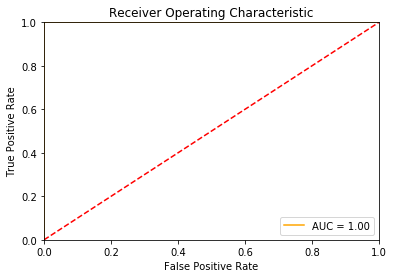

In [154]:
def plot_auc(labels, probs):
    ## Compute the false positive rate, true positive rate
    ## and threshold along with the AUC
    fpr, tpr, threshold = sklm.roc_curve(labels, probs[:,1])
    auc = sklm.auc(fpr, tpr)
    
    ## Plot the result
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, color = 'orange', label = 'AUC = %0.2f' % auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    
plot_auc(y_test, probabilities)    

                 Confusion matrix
                 Score positive    Score negative
Actual positive       316                 0
Actual negative       184                 0

Accuracy  0.63
 
           Positive      Negative
Num case      316           184
Precision    0.63          0.00
Recall       1.00          0.00
F1           0.77          0.00


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


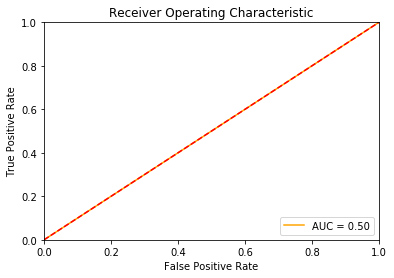

In [155]:
probs_positive = np.concatenate((np.ones((probabilities.shape[0], 1)), 
                                 np.zeros((probabilities.shape[0], 1))),
                                 axis = 1)
scores_positive = score_model(probs_positive, 0.5)
print_metrics(y_test, scores_positive)  
plot_auc(y_test, probs_positive)

In [25]:
logistic_mod = linear_model.LogisticRegression(class_weight = {0:0.45, 1:0.55}) 
logistic_mod.fit(X_train, y_train)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight={0: 0.45, 1: 0.55}, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='warn', tol=0.0001, verbose=0, warm_start=False)

In [ ]:
probabilities = logistic_mod.predict_proba(X_test)
print(probabilities[:500,:])

                 Confusion matrix
                 Score positive    Score negative
Actual positive       179                 0
Actual negative         0               121

Accuracy  1.00
 
           Positive      Negative
Num case      179           121
Precision    1.00          1.00
Recall       1.00          1.00
F1           1.00          1.00


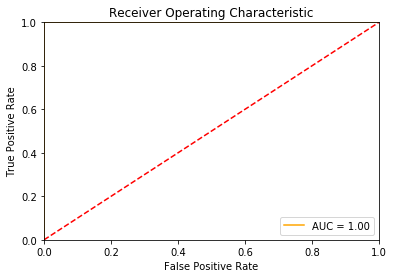

In [27]:
scores = score_model(probabilities, 0.5)
print_metrics(y_test, scores)  
plot_auc(y_test, probabilities) 

In [28]:
def test_threshold(probs, labels, threshold):
    scores = score_model(probs, threshold)
    print('')
    print('For threshold = ' + str(threshold))
    print_metrics(labels, scores)

thresholds = [0.45, 0.40, 0.35, 0.3, 0.25]
for t in thresholds:
    test_threshold(probabilities, y_test, t)


For threshold = 0.45
                 Confusion matrix
                 Score positive    Score negative
Actual positive       179                 0
Actual negative         0               121

Accuracy  1.00
 
           Positive      Negative
Num case      179           121
Precision    1.00          1.00
Recall       1.00          1.00
F1           1.00          1.00

For threshold = 0.4
                 Confusion matrix
                 Score positive    Score negative
Actual positive       179                 0
Actual negative         0               121

Accuracy  1.00
 
           Positive      Negative
Num case      179           121
Precision    1.00          1.00
Recall       1.00          1.00
F1           1.00          1.00

For threshold = 0.35
                 Confusion matrix
                 Score positive    Score negative
Actual positive       179                 0
Actual negative         0               121

Accuracy  1.00
 
           Positive      Negative
Num cas